In [ ]:
# setting logging to print only error messages from Sklearnex
import logging
logging.basicConfig()
logging.getLogger("SKLEARNEX").setLevel(logging.ERROR)

import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt

sns.set_theme(palette="Set2")

# Data Loading

In [ ]:
from google.colab import files

# Upload file
uploaded = files.upload()

In [ ]:
df = pd.read_csv("Bank Customer Churn Prediction.csv")

In [ ]:
df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
# the size of the dataset
df.shape

(10000, 12)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


No missing values.

# Data Splitting

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train, test = train_test_split(df, test_size = 0.2, random_state=451)

In [ ]:
train.shape, test.shape

((8000, 12), (2000, 12))

# EDA

## Univariate Data Analysis

In [ ]:
train.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
95,15699461,515,Spain,Male,35,10,176273.95,1,0,1,121277.78,0
220,15725311,726,France,Female,31,9,114722.05,2,1,1,98178.57,0
6857,15629299,546,Germany,Female,52,1,106074.89,1,1,1,23548.45,1
537,15739803,686,Spain,Male,34,9,0.00,2,1,0,127569.80,0
998,15659557,811,Germany,Female,28,4,167738.82,2,1,1,9903.42,0


<ipython-input-11-d8f6efb4f13c>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train, x=col, ax=axes[i], palette='Set2')
<ipython-input-11-d8f6efb4f13c>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train, x=col, ax=axes[i], palette='Set2')
<ipython-input-11-d8f6efb4f13c>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train, x=col, ax=axes[i], palette='Set2')
<ipython-input-11-d8f6efb4f13c>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x

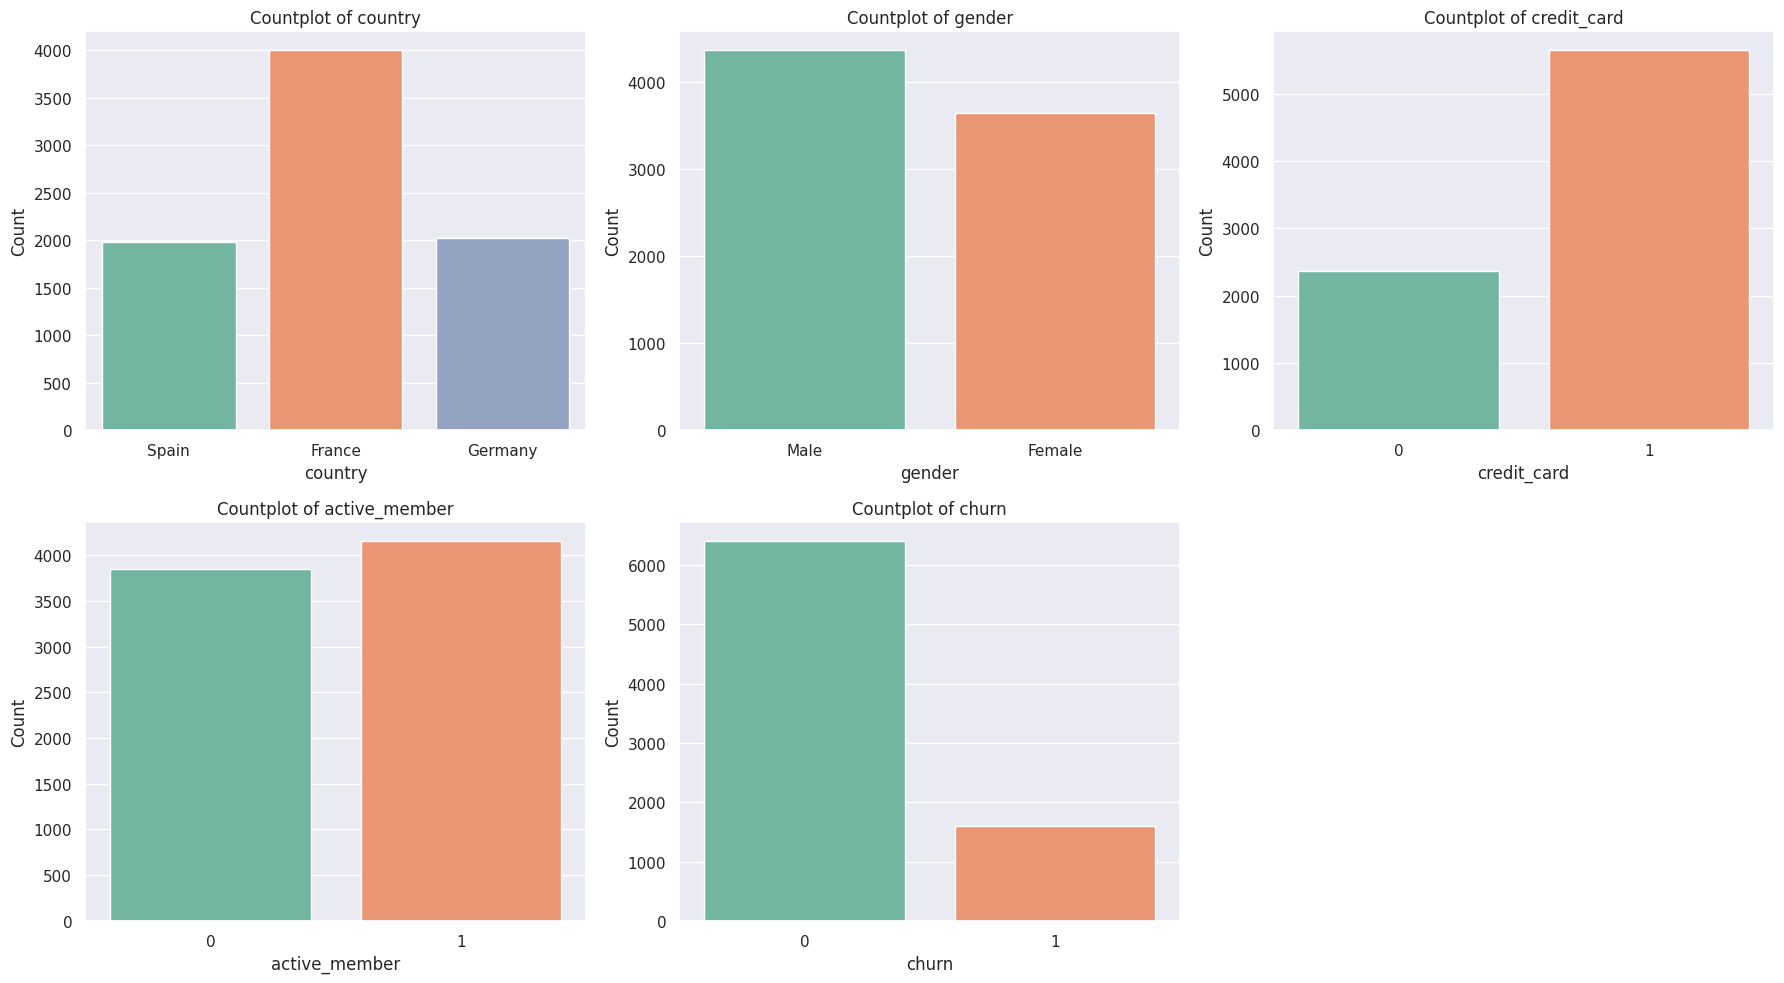

In [ ]:
# Columns to plot
cat_columns = ['country', 'gender', "credit_card", "active_member", "churn"]

# Set up
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

# Loop
for i, col in enumerate(cat_columns):
    sns.countplot(data=train, x=col, ax=axes[i], palette='Set2')
    axes[i].set_title(f"Countplot of {col}")
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x')

# Remove the unused subplot
fig.delaxes(axes[-1])

# Adjust layout and show
plt.tight_layout()
plt.show()

In [ ]:
train["churn"].value_counts(normalize=True) * 100

,proportion
churn,
0,79.975
1,20.025


There is some imbalance in the distribution of "credit_card", "active_member", and "churn".

About 80% of customers will not churn, which is much higher than the minority class. This class imbalance requires applying data balancing techniques to ensure the model achieves good accuracy and generalizes well.

<ipython-input-13-773a8132ff2e>:10: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=train, x=col, ax=axes[i], palette='Set2')
<ipython-input-13-773a8132ff2e>:10: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=train, x=col, ax=axes[i], palette='Set2')
<ipython-input-13-773a8132ff2e>:10: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=train, x=col, ax=axes[i], palette='Set2')
<ipython-input-13-773a8132ff2e>:10: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=train, x=col, ax=axes[i], palette='Set2')
<ipython-input-13-773a8132ff2e>:10: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=train, x=col, ax=axes[i], palette='Set2')


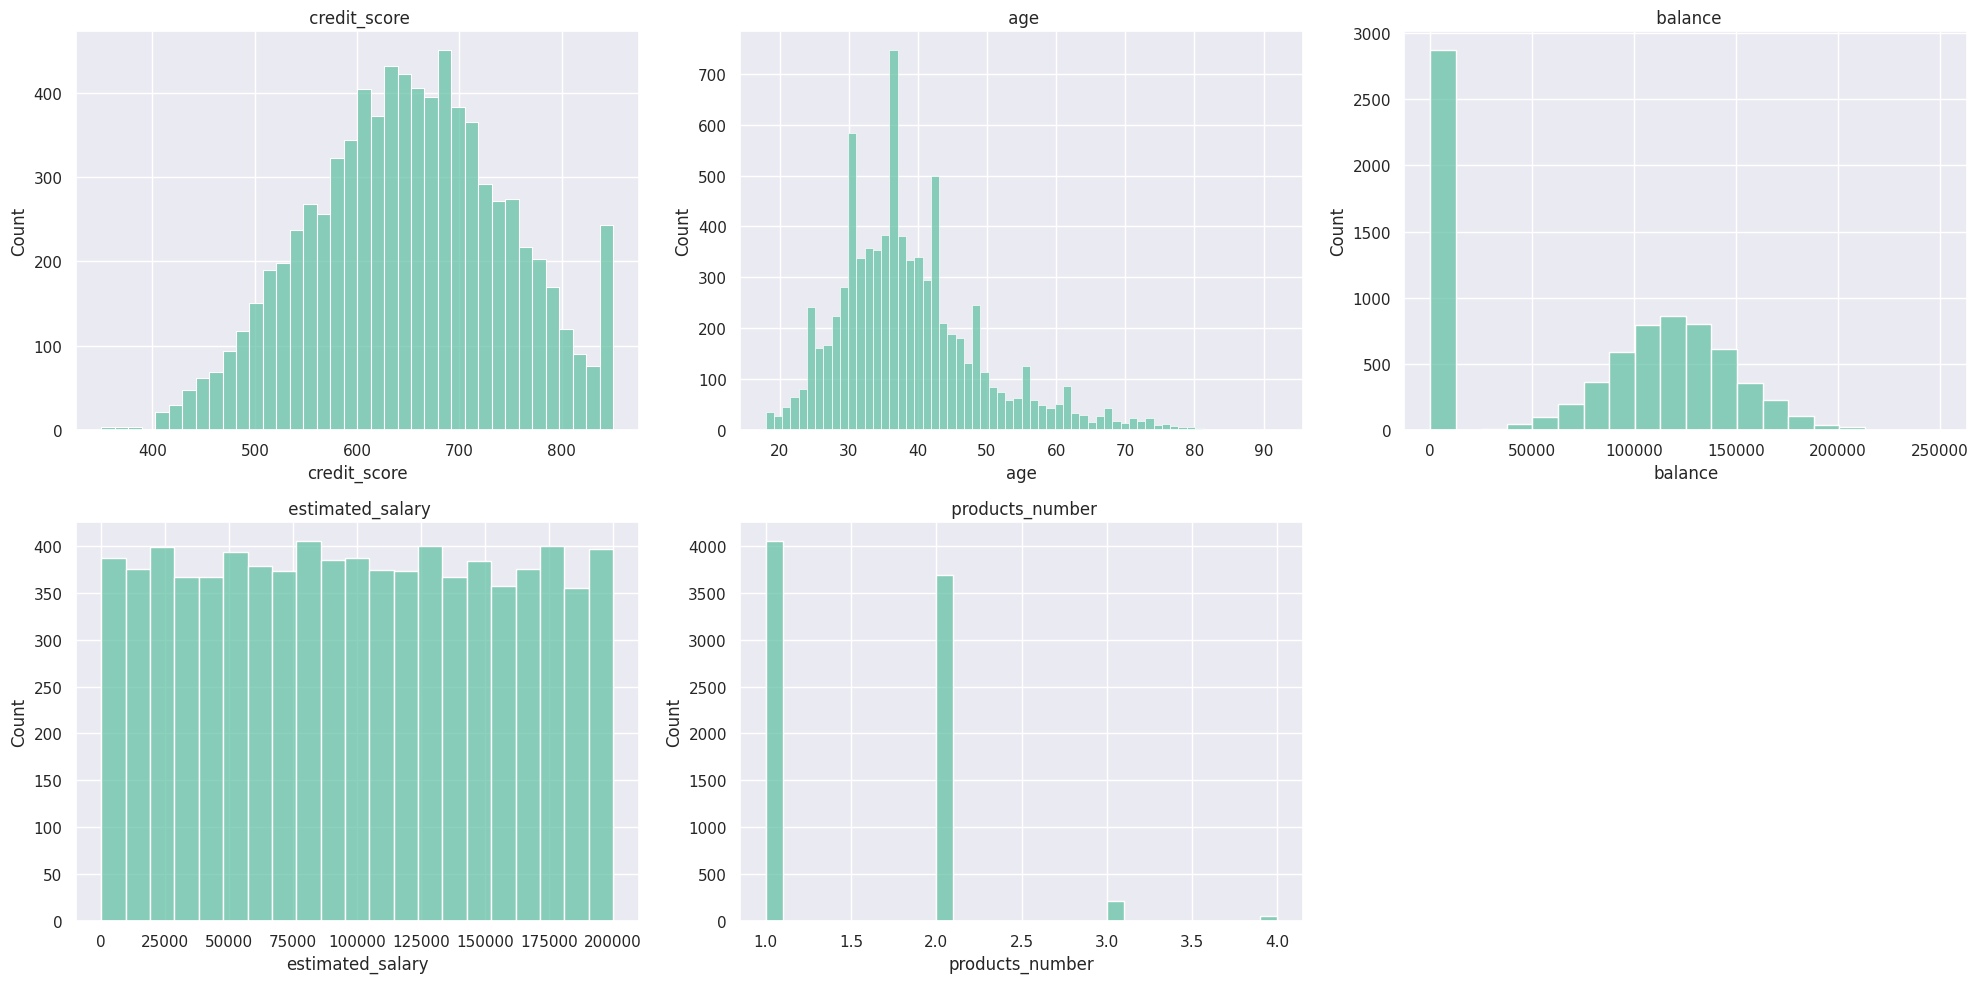

In [ ]:
# Columns to plot
num_columns = ['credit_score', 'age', 'balance', 'estimated_salary', "products_number"]

# Set up
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
axes = axes.flatten()

# Loop
for i, col in enumerate(num_columns):
    sns.histplot(data=train, x=col, ax=axes[i], palette='Set2')
    axes[i].set_title(f" {col}")
    axes[i].tick_params(axis='x')

# Remove the unused subplot
fig.delaxes(axes[-1])

# Adjust layout and show
plt.tight_layout()
plt.show()

The distribution of "credit_score" is approximately normal. The tails are relatively thin, indicating outliers.

The "age" has a right-skewed distribution. There are distinct peaks at certain ages, which may reflect age-group targeting.

The large pike in 'balance" indicates that many customers have no balance in their accounts.

The "estmiated_salary" speads evenly from 0 to 200,000.

## Bivariate Data Analysis

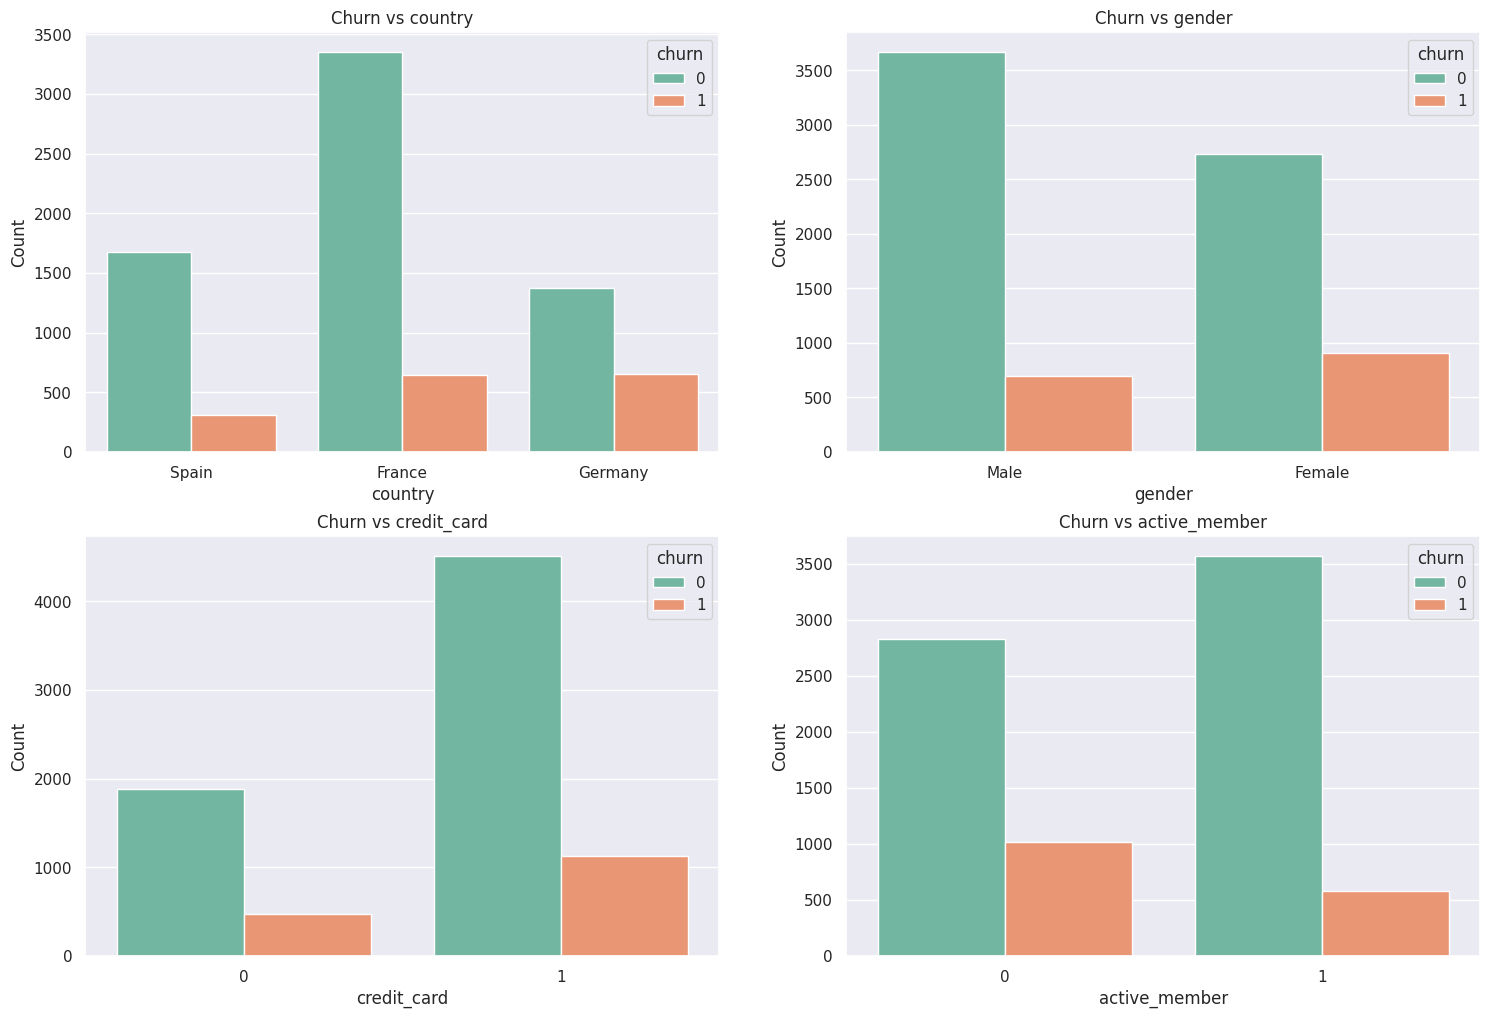

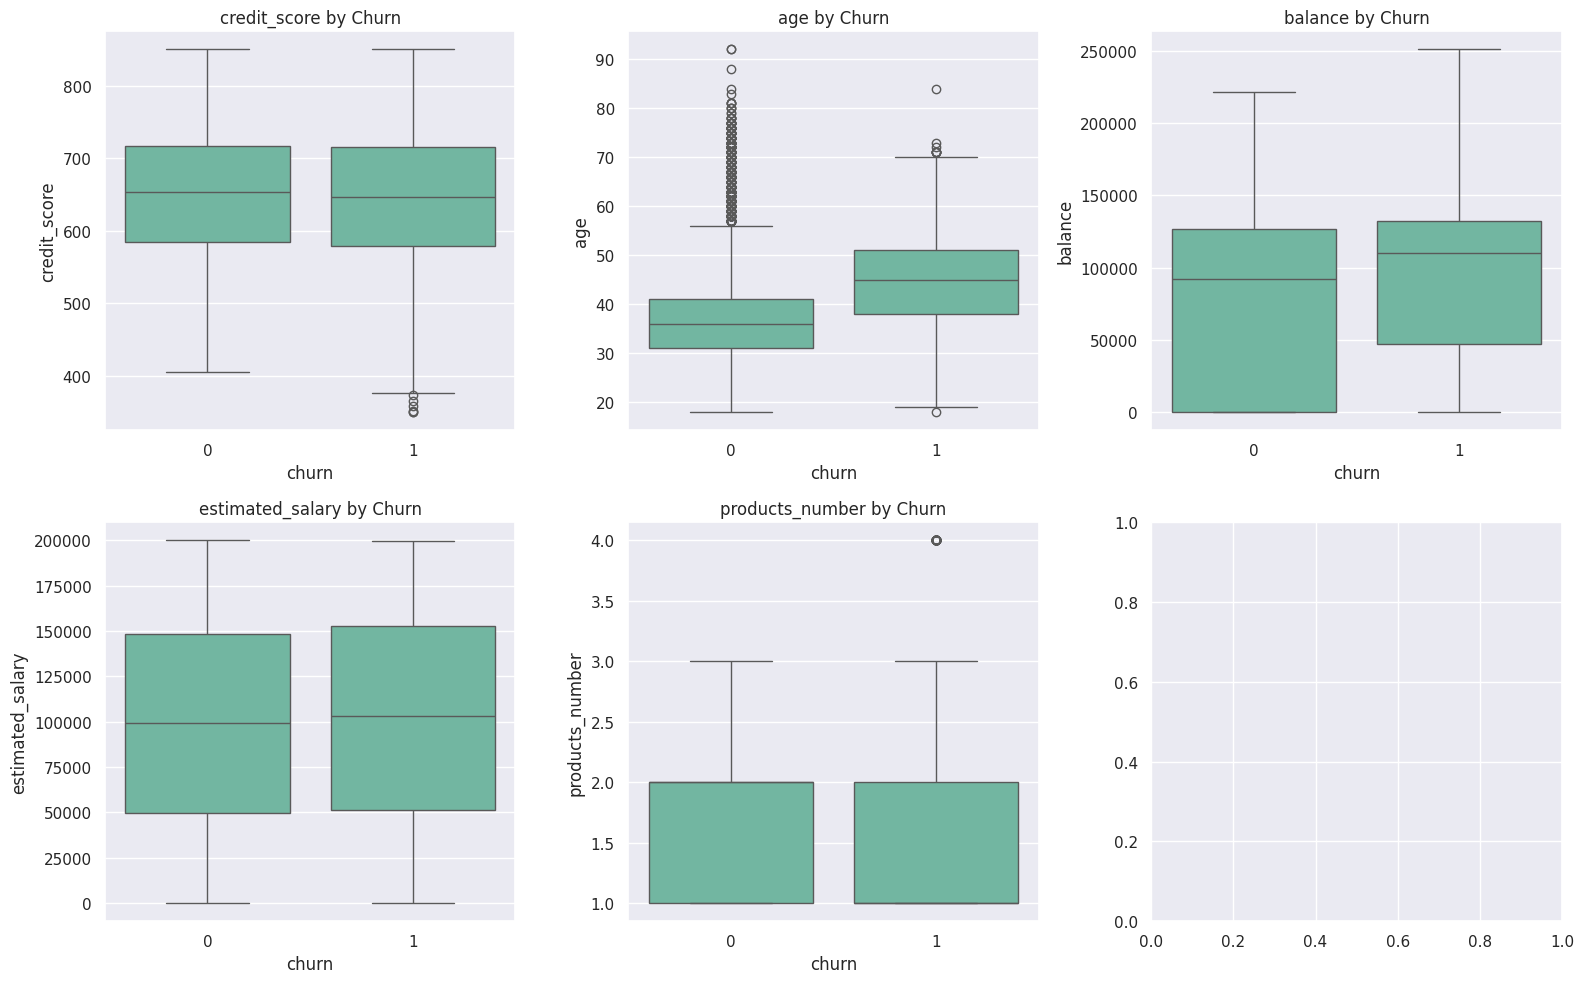

In [ ]:
# Define column types
categorical_cols = ['country', 'gender', 'credit_card', 'active_member']
numerical_cols = ['credit_score', 'age', 'balance', 'estimated_salary', 'products_number']

#  categorical features vs churn
fig_cat, axes_cat = plt.subplots(2, 2, figsize=(18, 12))
axes_cat = axes_cat.flatten()

for i, col in enumerate(categorical_cols):
    sns.countplot(data=train, x=col, hue='churn', ax=axes_cat[i])
    axes_cat[i].set_title(f'Churn vs {col}')
    axes_cat[i].set_ylabel('Count')

# numerical features vs churn
fig_num, axes_num = plt.subplots(2, 3, figsize=(16, 10))
axes_num = axes_num.flatten()

for i, col in enumerate(numerical_cols):
    sns.boxplot(data=train, x='churn', y=col, ax=axes_num[i])
    axes_num[i].set_title(f'{col} by Churn')

plt.tight_layout()
plt.show()

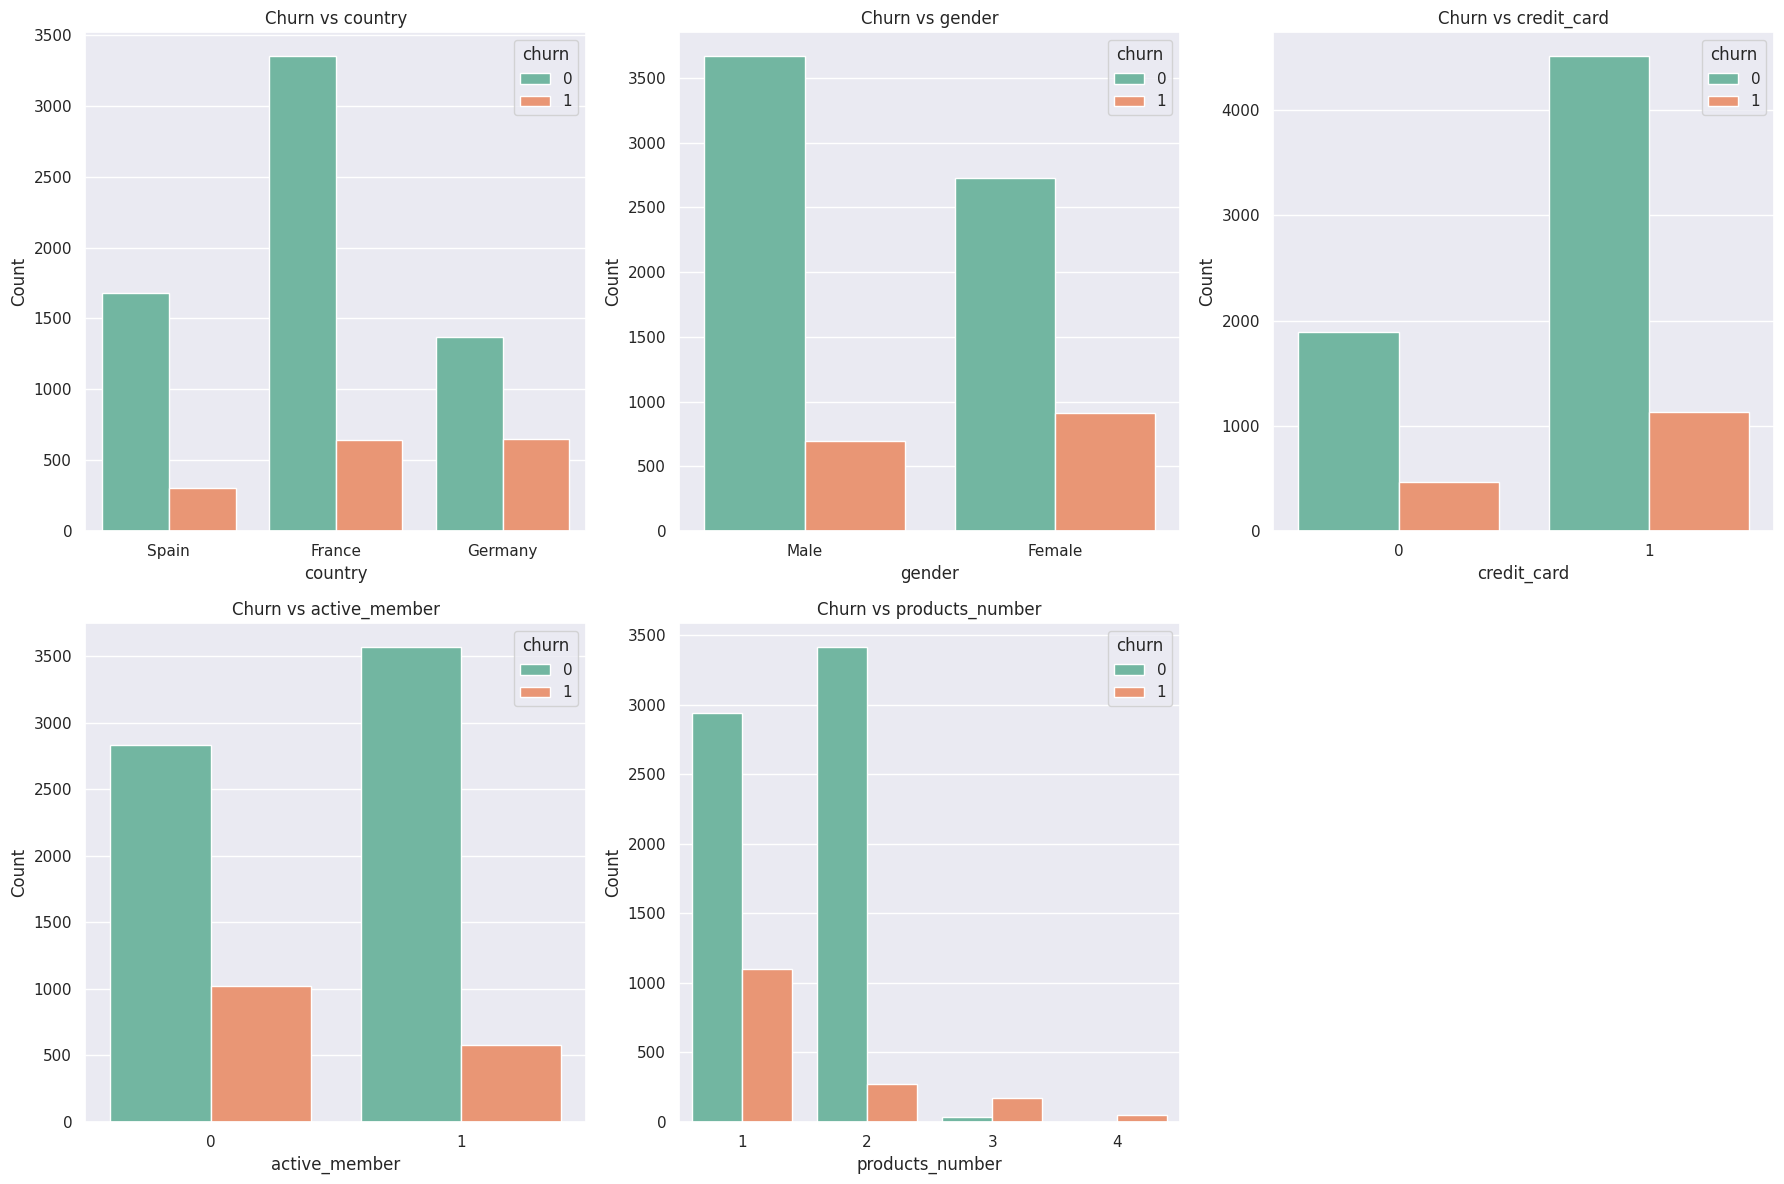

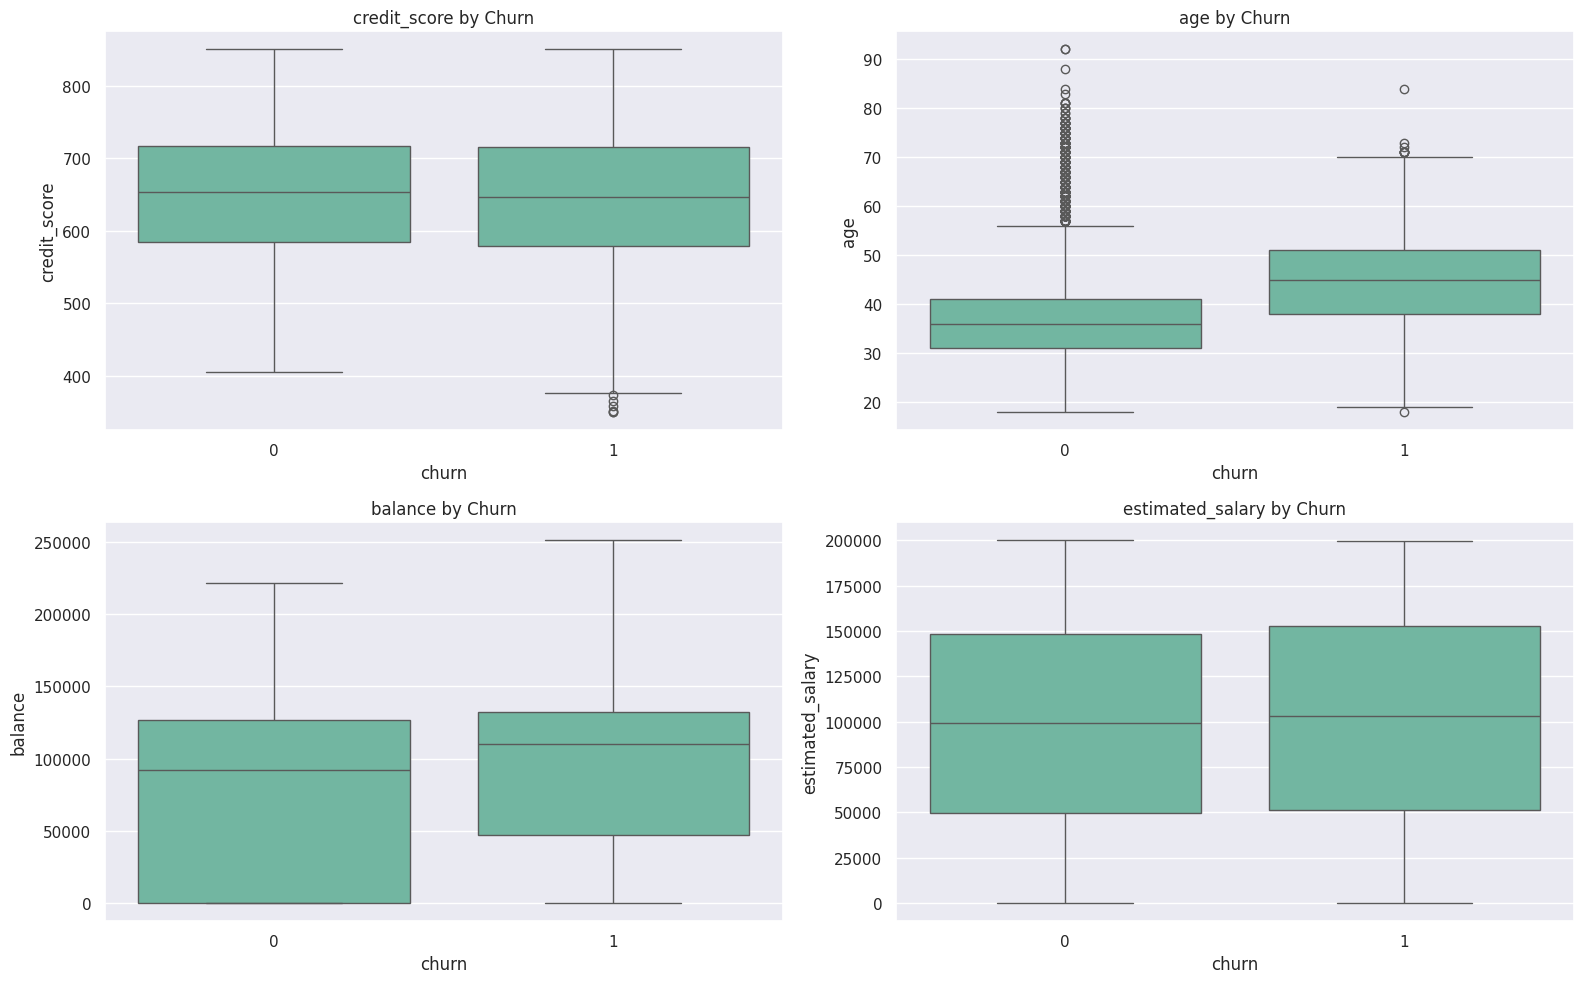

In [ ]:
# Define column types
categorical_cols = ['country', 'gender', 'credit_card', 'active_member', 'products_number']
numerical_cols = ['credit_score', 'age', 'balance', 'estimated_salary']

# Cat
fig_cat, axes_cat = plt.subplots(2, 3, figsize=(18, 12))
axes_cat = axes_cat.flatten()

for i, col in enumerate(categorical_cols):
    sns.countplot(data=train, x=col, hue='churn', ax=axes_cat[i])
    axes_cat[i].set_title(f'Churn vs {col}')
    axes_cat[i].set_ylabel('Count')
    axes_cat[i].tick_params(axis='x')

# Remove the unused subplot
fig_cat.delaxes(axes_cat[-1])

plt.tight_layout()
plt.show()

# Num
fig_num, axes_num = plt.subplots(2, 2, figsize=(16, 10))
axes_num = axes_num.flatten()

for i, col in enumerate(numerical_cols):
    sns.boxplot(data=train, x='churn', y=col, ax=axes_num[i])
    axes_num[i].set_title(f'{col} by Churn')

plt.tight_layout()
plt.show()


In [ ]:
from scipy.stats import ttest_ind

# Separate age by churn
age_churned = train[train['churn'] == 1]['age']
age_not_churned = train[train['churn'] == 0]['age']

# independent t-test
t_stat, p_value = ttest_ind(age_churned, age_not_churned, equal_var=False)

# results
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")

# Interpretation
if p_value < 0.05:
    print("Reject the H0: Age is significantly different between churned and non-churned customers.")
else:
    print("Fail to reject H0: No significant difference in age between churned and non-churned customers.")

T-statistic: 30.1713
P-value: 0.0000
Reject the H0: Age is significantly different between churned and non-churned customers.


# Data Preparation

## Outlier handling

In [ ]:
def remove_outliers(df, numeric_columns, threshold=1.5):
    df_no_outliers = df.copy()

    for column in numeric_columns:
        # Calculate IQR
        Q1 = df_no_outliers[column].quantile(0.25)
        Q3 = df_no_outliers[column].quantile(0.75)
        IQR = Q3 - Q1

        # Define bounds
        lower_bound = Q1 - threshold * IQR
        upper_bound = Q3 + threshold * IQR

        # Filter out outliers
        df_no_outliers = df_no_outliers[
            (df_no_outliers[column] >= lower_bound) & (df_no_outliers[column] <= upper_bound)
        ]

    return df_no_outliers

In [ ]:
# Apply the function
train = remove_outliers(train, num_columns)

In [ ]:
train.shape

(7648, 12)

In [ ]:
train.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
95,15699461,515,Spain,Male,35,10,176273.95,1,0,1,121277.78,0
220,15725311,726,France,Female,31,9,114722.05,2,1,1,98178.57,0
6857,15629299,546,Germany,Female,52,1,106074.89,1,1,1,23548.45,1
537,15739803,686,Spain,Male,34,9,0.00,2,1,0,127569.80,0
998,15659557,811,Germany,Female,28,4,167738.82,2,1,1,9903.42,0


## Drop Unused Columns

In [ ]:
train.drop(columns="customer_id", inplace=True)
test.drop(columns="customer_id", inplace=True)

In [ ]:
train.head()

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
95,515,Spain,Male,35,10,176273.95,1,0,1,121277.78,0
220,726,France,Female,31,9,114722.05,2,1,1,98178.57,0
6857,546,Germany,Female,52,1,106074.89,1,1,1,23548.45,1
537,686,Spain,Male,34,9,0.00,2,1,0,127569.80,0
998,811,Germany,Female,28,4,167738.82,2,1,1,9903.42,0


In [ ]:
test.head()

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
2098,601,France,Female,43,2,0.00,1,1,0,49713.87,1
9406,850,France,Male,31,6,131996.66,2,1,1,178747.43,0
2015,779,Germany,Female,40,2,75470.23,1,1,1,52894.01,0
4766,659,Spain,Female,38,9,0.00,2,1,1,35701.06,0
3863,674,France,Female,28,3,0.00,1,1,0,51536.99,0


## Category Encoding

In [ ]:
from sklearn.preprocessing import OneHotEncoder
one_hot_encoder = OneHotEncoder(drop="first", sparse_output=False)

### Trainset

In [ ]:
# categorical columns to transform
cat_cols = ["country", "gender"]

# fit an encoder and transform the trainset
cat_vals = train[cat_cols]
cat_vals

,country,gender
95,Spain,Male
220,France,Female
6857,Germany,Female
537,Spain,Male
998,Germany,Female
...,...,...
920,France,Male
8676,France,Male
7749,France,Female
382,Germany,Female


In [ ]:
# Fit and transform the categorical values
transformed = one_hot_encoder.fit_transform(cat_vals)
transformed

array([[0., 1., 1.],
       [0., 0., 0.],
       [1., 0., 0.],
       ...,
       [0., 0., 0.],
       [1., 0., 0.],
       [0., 0., 0.]])

In [ ]:
# the names of the new columns
new_col_names = one_hot_encoder.get_feature_names_out(cat_cols)
new_col_names

array(['country_Germany', 'country_Spain', 'gender_Male'], dtype=object)

In [ ]:
# put the transformed data as columns in the trainset dataframe
for i, new_col_name in enumerate(new_col_names):
    train[new_col_name] = transformed[:,i]

# check if the dummies are produced correctly in the trainset
train.head()

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,country_Germany,country_Spain,gender_Male
95,515,Spain,Male,35,10,176273.95,1,0,1,121277.78,0,0.0,1.0,1.0
220,726,France,Female,31,9,114722.05,2,1,1,98178.57,0,0.0,0.0,0.0
6857,546,Germany,Female,52,1,106074.89,1,1,1,23548.45,1,1.0,0.0,0.0
537,686,Spain,Male,34,9,0.00,2,1,0,127569.80,0,0.0,1.0,1.0
998,811,Germany,Female,28,4,167738.82,2,1,1,9903.42,0,1.0,0.0,0.0


In [ ]:
# delete the original categorical columns
train = train.drop(cat_cols, axis=1)

In [ ]:
train.head()

,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,country_Germany,country_Spain,gender_Male
95,515,35,10,176273.95,1,0,1,121277.78,0,0.0,1.0,1.0
220,726,31,9,114722.05,2,1,1,98178.57,0,0.0,0.0,0.0
6857,546,52,1,106074.89,1,1,1,23548.45,1,1.0,0.0,0.0
537,686,34,9,0.00,2,1,0,127569.80,0,0.0,1.0,1.0
998,811,28,4,167738.82,2,1,1,9903.42,0,1.0,0.0,0.0


### Testset

In [ ]:
# categorical columns to transform
cat_cols = ["country", "gender"]

# fit an encoder and transform the testset
cat_vals = test[cat_cols]
cat_vals

,country,gender
2098,France,Female
9406,France,Male
2015,Germany,Female
4766,Spain,Female
3863,France,Female
...,...,...
4335,Spain,Female
1303,Germany,Female
2528,France,Male
7242,Spain,Male


In [ ]:
# Fit and transform the categorical values
transformed = one_hot_encoder.fit_transform(cat_vals)
transformed

array([[0., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       ...,
       [0., 0., 1.],
       [0., 1., 1.],
       [0., 0., 1.]])

In [ ]:
# the names of the new columns
new_col_names = one_hot_encoder.get_feature_names_out(cat_cols)
new_col_names

array(['country_Germany', 'country_Spain', 'gender_Male'], dtype=object)

In [ ]:
# put the transformed data as columns in the testset dataframe
for i, new_col_name in enumerate(new_col_names):
    test[new_col_name] = transformed[:,i]

# check if the dummies are produced correctly in the testset
test.head()

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,country_Germany,country_Spain,gender_Male
2098,601,France,Female,43,2,0.00,1,1,0,49713.87,1,0.0,0.0,0.0
9406,850,France,Male,31,6,131996.66,2,1,1,178747.43,0,0.0,0.0,1.0
2015,779,Germany,Female,40,2,75470.23,1,1,1,52894.01,0,1.0,0.0,0.0
4766,659,Spain,Female,38,9,0.00,2,1,1,35701.06,0,0.0,1.0,0.0
3863,674,France,Female,28,3,0.00,1,1,0,51536.99,0,0.0,0.0,0.0


In [ ]:
# delete the original categorical columns
test = test.drop(cat_cols, axis=1)

In [ ]:
test.head()

,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,country_Germany,country_Spain,gender_Male
2098,601,43,2,0.00,1,1,0,49713.87,1,0.0,0.0,0.0
9406,850,31,6,131996.66,2,1,1,178747.43,0,0.0,0.0,1.0
2015,779,40,2,75470.23,1,1,1,52894.01,0,1.0,0.0,0.0
4766,659,38,9,0.00,2,1,1,35701.06,0,0.0,1.0,0.0
3863,674,28,3,0.00,1,1,0,51536.99,0,0.0,0.0,0.0


# Citing this notebook
If you use this notebook in your work, please cite it as follows:

Linh, H. (2025). Machine Learning for Business. Lecture examples and exercises. (Version 1.0.0). URL: https://github.com/MsLinhEIU/MIS-451---Machine-Learning-for-Business-Analytics/upload